In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline, interp1d
from asym_uncertainties import add_asym

In [2]:
E_nu = [139.3307426423607, 245.3934466093052, 427.88747974059413, 708.1315242487499, 1222.0509323577705, 2672.7624459727444,
        3306.910892645023, 5061.7909183696775, 10287.314726142255, 28446.82247513599, 66737.28730628472, 163985.18407345077,
        632109.9108011357, 856943.3563562501, 1863162.1062250915]
sigma_nu = [9.38045658e-37, 1.61676917e-36, 2.73988855e-36, 4.43237880e-36, 7.34739264e-36, 1.44747135e-35, 1.72285975e-35,
            2.38716559e-35,3.96252123e-35, 7.97213420e-35, 1.40340551e-34, 2.53738392e-34, 6.26907360e-34, 7.79360007e-34, 1.31111407e-33]
E_nu_bar = [149.62511375815114, 242.64629802906907, 433.23537305604464, 708.1315242487499, 1222.0509323577705, 2672.7624459727444,
            3306.910892645023, 5061.7909183696775, 10287.314726142255, 28446.82247513599, 66737.28730628472, 163985.18407345077,
            615070.7489250309, 856943.3563562501, 1863162.1062250915]
sigma_nu_bar = [5.33231887e-37, 8.64739482e-37, 1.55287247e-36, 2.55277043e-36, 4.32998293e-36, 9.08519251e-36, 1.09686016e-35, 
                1.56436419e-35, 2.81948626e-35, 6.21615750e-35, 1.18369427e-34, 2.19996584e-34, 5.72041108e-34, 7.08829690e-34, 1.23444074e-33]

In [3]:
# callable functions
func_sigma_nu_cubic = CubicSpline(E_nu, sigma_nu)
func_sigma_nu_bar_cubic = CubicSpline(E_nu_bar, sigma_nu_bar)

func_sigma_nu_linear = interp1d(E_nu, sigma_nu)
func_sigma_nu_bar_linear = interp1d(E_nu_bar, sigma_nu_bar)

In [4]:
x_nu = np.geomspace(min(E_nu), 1e13, 500)

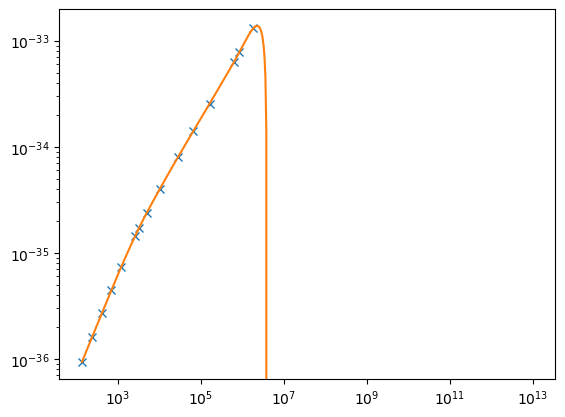

In [5]:
plt.plot(E_nu, sigma_nu, "x")
plt.plot(x_nu, func_sigma_nu_cubic(x_nu))
#plt.plot(E_nu, func_sigma_nu_linear(E_nu))
plt.xscale("log")
plt.yscale("log")

In [6]:
E = [50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1e6, 2e6, 5e6, 1e7, 2e7, 5e7, 1e8, 2e8, 5e8, 1e9, 2e9, 5e9, 1e10, 2e10, 5e10, 1e11, 2e11, 5e11]

sigma_nu_CC = [i * 1e-36 for i in 
               [0.32, 0.65, 1.3, 3.2, 6.2, 12, 27, 47, 77, 140, 210, 310, 490, 690, 950, 1400, 1900, 2600, 3700, 4800, 6200, 8700, 11000, 14000, 19000, 24000, 30000, 39000, 48000, 59000, 75000]]
sigma_nu_NC = [i * 1e-36 for i in 
               [0.10, 0.20, 0.41, 1.0, 2.0, 3.8, 8.6, 15, 26, 49, 75, 110, 180, 260, 360, 540, 730, 980, 1400, 1900, 2400, 3400, 4400, 5600, 7600, 9600, 12000, 16000, 20000, 24000, 31000]]
sigma_nu_bar_CC = [i * 1e-36 for i in 
                   [0.15, 0.33, 0.69, 1.8, 3.6, 7, 17, 31, 55, 110, 180, 270, 460, 660, 920, 1400, 1900, 2500, 3700, 4800, 6200, 8700, 11000, 14000, 19000, 24000, 30000, 39000, 48000, 59000, 75000]]
sigma_nu_bar_NC = [i * 1e-36 for i in 
                   [0.05, 0.12, 0.24, 0.61, 1.20, 2.4, 5.8, 11, 19, 39, 64, 99, 170, 240, 350, 530, 730, 980, 1400, 1900, 2400, 3400, 4400, 5600, 7600, 9600, 12000, 16000, 20000, 24000, 31000]]

In [7]:
# upper and lower errors
nu_CC_down = [i * 0.01 * 1e-36 for i in
            [2.3, 2.0, 1.8, 1.7, 1.6, 1.6, 1.5, 1.4, 1.3, 1.2, 1.2, 1.1, 1.0, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 1.0, 1.1, 1.2, 1.2, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]]  # in %
nu_CC_up = [i * 0.01 * 1e-36 for i in
            [4.1, 3.8, 3.5, 3.2, 3.0, 2.7, 2.3, 2.0, 1.8, 1.5, 1.4, 1.5, 1.6, 1.7, 1.9, 2.0, 2.2, 2.3, 2.5, 2.7, 2.8, 3.0, 3.1, 3.3, 3.4, 3.6, 3.7, 3.8, 4.0, 4.1, 4.2]]

nu_NC_down = [i * 0.01 * 1e-36 for i in
            [1.9, 1.8, 1.6, 1.5, 1.4, 1.3, 1.3, 1.2, 1.1, 1.0, 1.0, 0.9, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.9, 0.9, 1.0, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.7, 1.8, 1.9, 2.0]]
nu_NC_up = [i * 0.01 * 1e-36 for i in
            [3.8, 3.5, 3.2, 2.9, 2.7, 2.4, 2.1, 1.8, 1.6, 1.3, 1.2, 1.2, 1.3, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.7, 2.9, 3.0, 3.2, 3.4, 3.5, 3.6, 3.8, 3.9, 4.0, 4.2]]

# antineutrino
nu_bar_CC_down = [i * 0.01 * 1e-36 for i in
                [9.0, 7.4, 6.5, 5.7, 5.2, 4.6, 3.7, 3.0, 2.3, 1.7, 1.4, 1.2, 1.1, 1.0, 1.0, 0.9, 0.9, 0.9, 0.9, 1.0, 1.0, 1.1, 1.2, 1.2, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]]
nu_bar_CC_up = [i * 0.01 * 1e-36 for i in
                [15.0, 13.3, 11.9, 10.5, 9.4, 8.3, 6.5, 5.1, 3.8, 2.5, 1.9, 1.7, 1.7, 1.8, 1.9, 2.1, 2.2, 2.3, 2.5, 2.7, 2.8, 3.0, 3.1, 3.3, 3.4, 3.6, 3.7, 3.8, 4.0, 4.1, 4.2]]

nu_bar_NC_down = [i * 0.01 * 1e-36 for i in
                [6.4, 5.7, 5.1, 4.6, 4.2, 3.8, 3.2, 2.7, 2.1, 1.5, 1.2, 1.0, 0.9, 0.8, 0.8, 0.8, 0.8, 0.8, 0.9, 0.9, 1.0, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.7, 1.8, 1.9, 2.0]]
nu_bar_NC_up = [i * 0.01 * 1e-36 for i in
                [12.0, 10.7, 9.6, 8.6, 7.8, 7.0, 5.7, 4.6, 3.6, 2.4, 1.7, 1.4, 1.4, 1.5, 1.6, 1.9, 2.0, 2.2, 2.4, 2.6, 2.7, 2.9, 3.0, 3.2, 3.4, 3.5, 3.6, 3.8, 3.9, 4.0, 4.2]]


In [8]:
# total cross sections and errors

# neutrino
x0 = list(zip(sigma_nu_CC, sigma_nu_NC))
print([a+b for a,b in x0])
s1 = list(zip(nu_CC_down, nu_NC_down))
s2 = list(zip(nu_CC_up, nu_NC_up))

sigma_tot_nu = []
sigma_tot_nu_down = []
sigma_tot_nu_up = []
for i in range(len(list(zip(sigma_nu_CC, sigma_nu_NC)))):
    tot, s_up, s_down = add_asym(x0[i], s1[i], s2[i], order=2, ohwell=True)
    sigma_tot_nu.append(tot)
    sigma_tot_nu_down.append(s_up)
    sigma_tot_nu_up.append(s_down)
    
print(sigma_tot_nu)

func_sigma_tot_nu = interp1d(E, sigma_tot_nu)
func_sigma_tot_nu_max = interp1d(E, [a+b for a,b in zip(sigma_tot_nu, sigma_tot_nu_up)])
func_sigma_tot_nu_min = interp1d(E, [a-b for a,b in zip(sigma_tot_nu, sigma_tot_nu_down)])

# antineutrino
x0 = list(zip(sigma_nu_bar_CC, sigma_nu_bar_NC))
s1 = list(zip(nu_bar_CC_down, nu_bar_NC_down))
s2 = list(zip(nu_bar_CC_up, nu_bar_NC_up))

sigma_tot_nu_bar = []
sigma_tot_nu_bar_down = []
sigma_tot_nu_bar_up = []
for i in range(len(list(zip(sigma_nu_bar_CC, sigma_nu_bar_NC)))):
    tot, s_up, s_down = add_asym(x0[i], s1[i], s2[i], order=2, ohwell=True)
    sigma_tot_nu_bar.append(tot)
    sigma_tot_nu_bar_down.append(s_up)
    sigma_tot_nu_bar_up.append(s_down)

func_sigma_tot_nu_bar = interp1d(E, sigma_tot_nu_bar)
func_sigma_tot_nu_bar_max = interp1d(E, [a+b for a,b in zip(sigma_tot_nu_bar, sigma_tot_nu_bar_up)])
func_sigma_tot_nu_bar_min = interp1d(E, [a-b for a,b in zip(sigma_tot_nu_bar, sigma_tot_nu_bar_down)])

[4.2e-37, 8.5e-37, 1.71e-36, 4.2000000000000005e-36, 8.199999999999999e-36, 1.58e-35, 3.56e-35, 6.199999999999999e-35, 1.03e-34, 1.8899999999999998e-34, 2.8500000000000003e-34, 4.2e-34, 6.6999999999999995e-34, 9.5e-34, 1.31e-33, 1.94e-33, 2.63e-33, 3.58e-33, 5.0999999999999994e-33, 6.7e-33, 8.599999999999999e-33, 1.2099999999999999e-32, 1.54e-32, 1.96e-32, 2.66e-32, 3.36e-32, 4.2e-32, 5.499999999999999e-32, 6.8e-32, 8.299999999999999e-32, 1.06e-31]
[4.295372795312469e-37, 8.589909096962311e-37, 1.7184901882321578e-36, 4.207437179588108e-36, 8.206918912295495e-36, 1.5805628020574234e-35, 3.560406251553193e-35, 6.20030338217405e-35, 1.0300252393979628e-34, 1.8900299999999999e-34, 2.85002e-34, 4.200035e-34, 6.700055e-34, 9.50007e-34, 1.310009e-33, 1.9400105e-33, 2.6300124999999998e-33, 3.580014e-33, 5.1000154999999996e-33, 6.700017500000001e-33, 8.6000175e-33, 1.2100018999999998e-32, 1.5400018999999998e-32, 1.9600020499999998e-32, 2.6600020499999995e-32, 3.3600021e-32, 4.2000021e-32, 5.50

In [9]:
x = np.geomspace(min(E), max(E))

In [10]:
print(sigma_tot_nu[0])
print(sigma_tot_nu[0] + sigma_tot_nu_down[0])
print(sigma_tot_nu[0] - sigma_tot_nu_up[0])

4.295372795312469e-37
4.6549770770100745e-37
3.756514104239802e-37


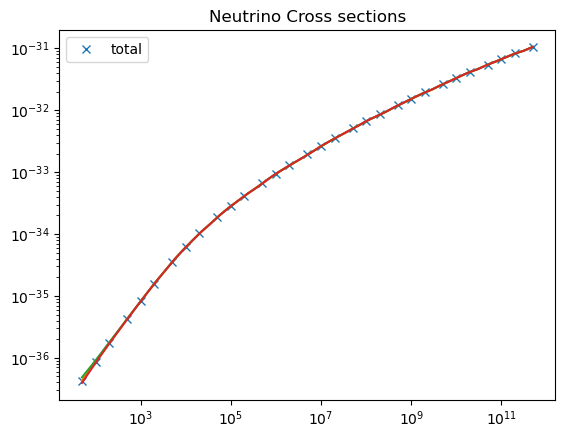

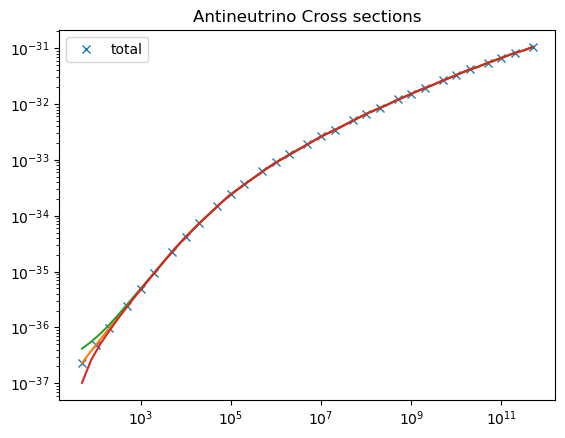

In [11]:
# plotting total cross section

plt.figure()
plt.plot(E, sigma_tot_nu, "x", label="total")
plt.plot(x, func_sigma_tot_nu(x))
#plt.plot(E, sigma_tot_nu_up, "x", label="up")
plt.plot(x, func_sigma_tot_nu_max(x))
#plt.plot(E, sigma_tot_nu_down, "x", label="down")
plt.plot(x, func_sigma_tot_nu_min(x))
plt.title("Neutrino Cross sections")
plt.legend()
plt.xscale("log")
plt.yscale("log")

plt.figure()
plt.plot(E, sigma_tot_nu_bar, "x", label="total")
plt.plot(x, func_sigma_tot_nu_bar(x))
#plt.plot(E, sigma_tot_nu_bar_up, "x", label="up")
plt.plot(x, func_sigma_tot_nu_bar_max(x))
#plt.plot(E, sigma_tot_nu_bar_down, "x", label="down")
plt.plot(x, func_sigma_tot_nu_bar_min(x))
plt.title("Antineutrino Cross sections")
plt.legend()
plt.xscale("log")
plt.yscale("log")

In [12]:
func_sigma_nu_CC = interp1d(E, sigma_nu_CC)
func_sigma_nu_NC = interp1d(E, sigma_nu_NC)
func_sigma_nu_bar_CC = interp1d(E, sigma_nu_bar_CC)
func_sigma_nu_bar_NC = interp1d(E, sigma_nu_bar_NC)

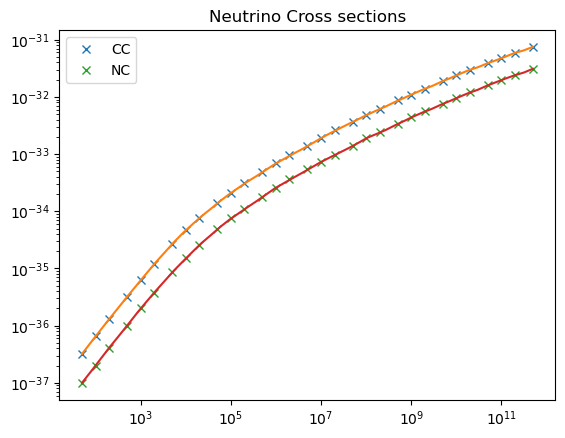

In [13]:
plt.plot(E, sigma_nu_CC, "x", label="CC")
plt.plot(x, func_sigma_nu_CC(x))
plt.plot(E, sigma_nu_NC, "x", label="NC")
plt.plot(x, func_sigma_nu_NC(x))
plt.title("Neutrino Cross sections")
plt.legend()
plt.xscale("log")
plt.yscale("log")

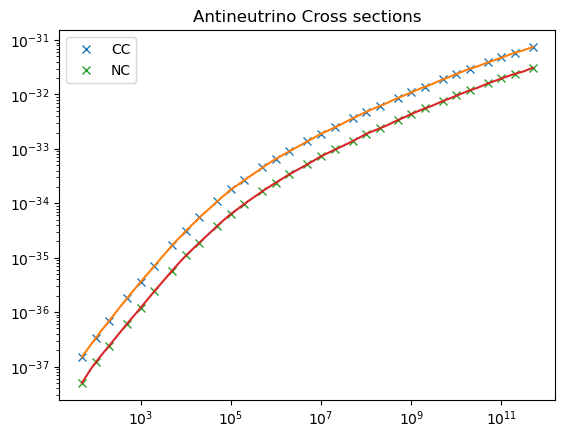

In [14]:
plt.plot(E, sigma_nu_bar_CC, "x", label="CC")
plt.plot(x, func_sigma_nu_bar_CC(x))
plt.plot(E, sigma_nu_bar_NC, "x", label="NC")
plt.plot(x, func_sigma_nu_bar_NC(x))
plt.title("Antineutrino Cross sections")
plt.legend()
plt.xscale("log")
plt.yscale("log")